In [5]:
# 1️⃣ Install paket yang dibutuhkan
!pip install langchain_community replicate

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langchain_community.llms import Replicate
from google.colab import userdata
import os

sns.set(style="whitegrid")

🖱️ Silakan upload 2 file:
- ntia_adopsi.csv  (kolom: year, internet_use_percent)
- wifi_bottleneck.csv  (kolom: wifi_mbps, access_mbps)


Saving wifi_bottleneck.csv to wifi_bottleneck.csv
Saving ntia_adopsi.csv to ntia_adopsi.csv

✅ Data Adopsi Internet:


,year,internet_use_percent
0,2015,70.3
1,2016,73.8
2,2017,76.1
3,2018,78.5
4,2019,81.2



✅ Data Kecepatan Wi‑Fi:


,wifi_mbps,access_mbps
0,40,100
1,80,90
2,60,75
3,50,60
4,90,100


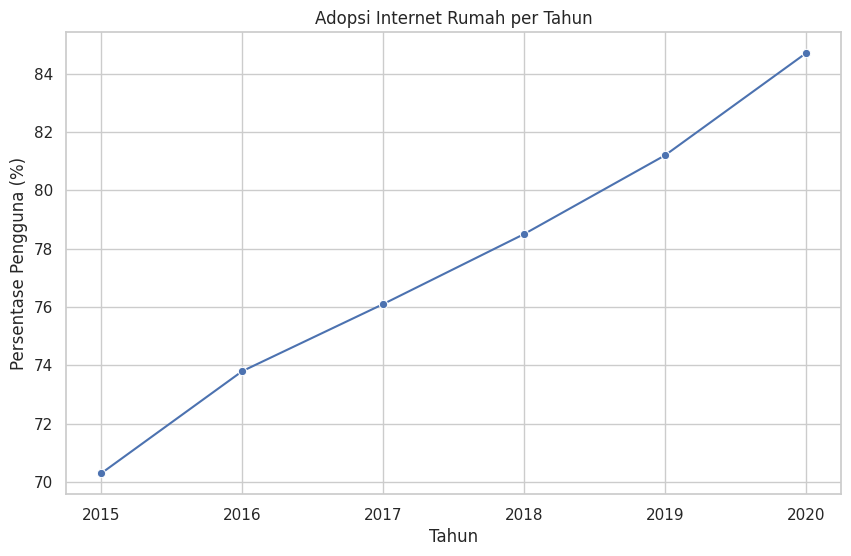

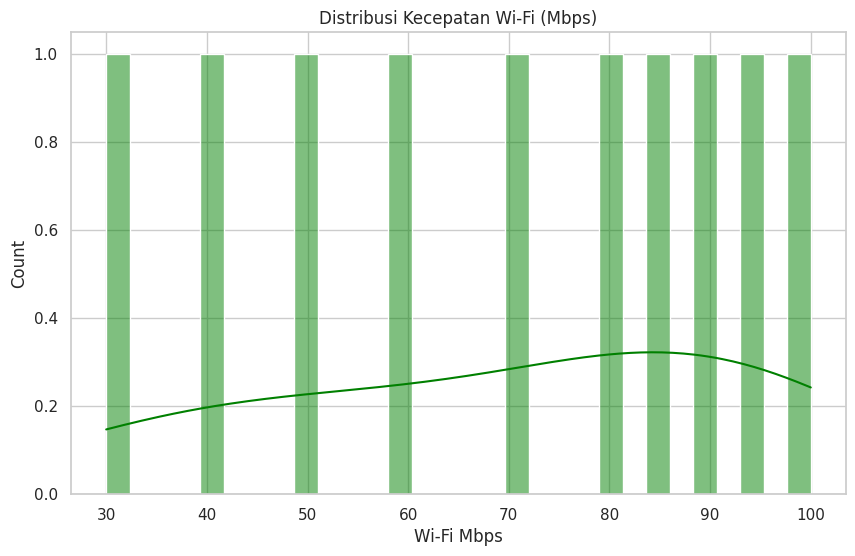

💡 Persentase rumah dengan Wi‑Fi bottleneck: 90.0 %
📄 Ringkasan Otomatis:
Berdasarkan informasi yang diberikan, persentase penggunaan internet rumah (broadband) meningkat dari 70.3% pada tahun 2015 kepada 84.7% pada tahun 2020. Ini menunjukkan kebutuhan yang beruntung untuk akses internet di rumah di negara tersebut. 

Namun, masalah lain yang muncul adalah bahwa sekitar 50% rumah mengalami kecepatan Wi-Fi yang lebih lambat dari kecepatan akses yang dijanjikan oleh Penyedia Layanan Internet (ISP). Hal ini menunjukkan discrepansi antara kecepatan akses yang diterima dan kecepatan Wi-Fi yang digunakan secara praktis. 

Mungkin ada beberapa alasan untuk keterlambatan ini, antara lain:

1. **Infrastruktur Wi-Fi Rumah Tangga**: Banyak rumah mungkin memiliki router Wi-Fi yang tidak optimal atau terlalu lama, yang dapat membebani kinerja konektivitas.
2. **Interferensi**: Alas kaki signal Wi-Fi dapat dihambat oleh objek fisik seperti dinding berbahan bakar, lantai, atau peralatan elektronik la

In [7]:
# 2️⃣ Upload dua file CSV manual
from google.colab import files
print("🖱️ Silakan upload 2 file:")
print("- ntia_adopsi.csv  (kolom: year, internet_use_percent)")
print("- wifi_bottleneck.csv  (kolom: wifi_mbps, access_mbps)")

uploaded = files.upload()

# 3️⃣ Baca dan tampilkan data
ntia = pd.read_csv("ntia_adopsi.csv")
wifi = pd.read_csv("wifi_bottleneck.csv")

print("\n✅ Data Adopsi Internet:")
display(ntia.head())

print("\n✅ Data Kecepatan Wi‑Fi:")
display(wifi.head())

# 4️⃣ Visualisasi tren adopsi internet rumah
plt.figure(figsize=(10,6))
sns.lineplot(data=ntia, x='year', y='internet_use_percent', marker='o')
plt.title('Adopsi Internet Rumah per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Persentase Pengguna (%)')
plt.grid(True)
plt.show()

# 5️⃣ Analisis Bottleneck Wi‑Fi
wifi['bottleneck'] = wifi['wifi_mbps'] < wifi['access_mbps']
plt.figure(figsize=(10,6))
sns.histplot(wifi['wifi_mbps'], bins=30, kde=True, color='green')
plt.title('Distribusi Kecepatan Wi‑Fi (Mbps)')
plt.xlabel('Wi‑Fi Mbps')
plt.show()

print("💡 Persentase rumah dengan Wi‑Fi bottleneck:",
      round(wifi['bottleneck'].mean()*100, 2), "%")

# 6️⃣ Summarization Insight dengan Replicate
api_token = userdata.get("api_token")  # Token disimpan dari colab secrets
os.environ["REPLICATE_API_TOKEN"] = api_token


# Ganti model ke yang aktif
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={"max_length": 200}
)

text = """
Antara 2015 dan 2020, persentase penggunaan internet rumah meningkat dari 70.3% ke 84.7%.
Namun, sekitar 50% rumah mengalami kecepatan Wi-Fi yang lebih rendah daripada kecepatan akses dari ISP mereka.
"""

summary = llm.invoke(text)
print("📄 Ringkasan Otomatis:")
print(summary)

In [1]:
#Nama: Luthfi Rizky Mihardi
#Instansi: Universitas Krisnadwipayana
